In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
d1=pd.read_csv('/content/drive/MyDrive/IAPM/new.csv')
d1

,Date,Open Price,Close Price
0,01-Jan-21,47785.28,47868.98
1,04-Jan-21,48109.17,48176.80
2,05-Jan-21,48037.63,48437.78
3,06-Jan-21,48616.66,48174.06
4,07-Jan-21,48524.36,48093.32
...,...,...,...
243,27-Dec-21,56948.33,57420.24
244,28-Dec-21,57751.21,57897.48
245,29-Dec-21,57892.31,57806.49
246,30-Dec-21,57755.40,57794.32


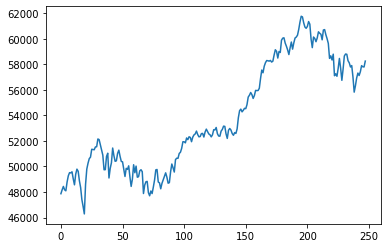

In [49]:
d1['Close Price'].plot()

In [50]:
data=d1[['Date','Close Price']] #Using only date and closing price to predict the future values
data = data.rename(columns = {"Date":"ds","Close Price":"y"}) 
data
#Date = ds
#Close Price = y

,ds,y
0,01-Jan-21,47868.98
1,04-Jan-21,48176.80
2,05-Jan-21,48437.78
3,06-Jan-21,48174.06
4,07-Jan-21,48093.32
...,...,...
243,27-Dec-21,57420.24
244,28-Dec-21,57897.48
245,29-Dec-21,57806.49
246,30-Dec-21,57794.32


In [51]:
def dateformatter(date):
    month_dict={'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07',
    'Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
    year='20'+date[7:]
    month=month_dict[date[3:6]]
    date_val=date[:2]
    return year+'-'+month+'-'+date_val

In [ ]:
for i in range(len(data['ds'])): 
  data['ds'][i]=dateformatter(data['ds'][i])
  i+=1

In [55]:
data

,ds,y
0,2021-01-01,47868.98
1,2021-01-04,48176.80
2,2021-01-05,48437.78
3,2021-01-06,48174.06
4,2021-01-07,48093.32
...,...,...
243,2021-12-27,57420.24
244,2021-12-28,57897.48
245,2021-12-29,57806.49
246,2021-12-30,57794.32


In [79]:
from fbprophet import Prophet #The Prophet model created by Facebook
fbp = Prophet(yearly_seasonality=True) 
# Fitting the model
fbp.fit(data)
# We need to specify the number of days in future
# We'll be predicting the full 2021 stock prices
fut = fbp.make_future_dataframe(periods=300)
forecast = fbp.predict(fut)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [80]:
from fbprophet.plot import plot_plotly, plot_components_plotly
# A better plot than the simple matplotlib
plot_plotly(fbp, forecast,xlabel='Date',ylabel='Closing Price')